Перевіряємо чи є різниця між тим, що клієнти платили картою чи готівкою
та чи є пряма залежність кількості чайових від вартості поїздки

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
taxi = sns.load_dataset("taxis")

In [35]:
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Перевіряємо яка залежність чових від вартості поїздки

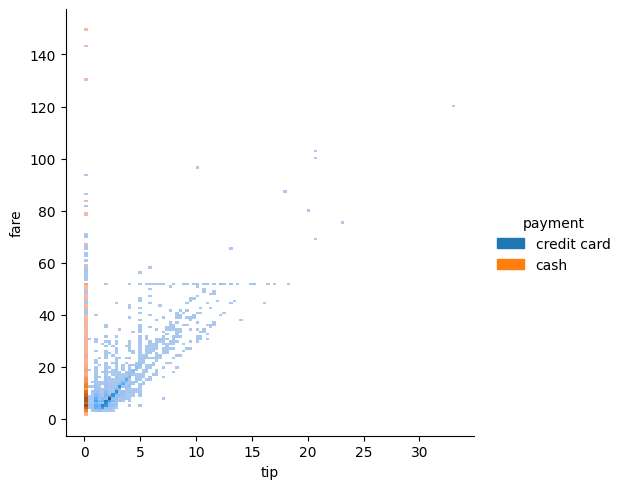

In [33]:
sns.displot(taxi, x="tip", y="fare", hue="payment")

Згідно з графіком, клієнти що платили готівкою взагалі не платили чайових. 
Це може бути пов'язано з тим, що водіям не дозволено брати готівкові чайові.
Або може бути якась інша причина.

Перевіряємо чи залежить кількість чайових від кількості пасажирів.

<Axes: xlabel='passengers', ylabel='tip'>

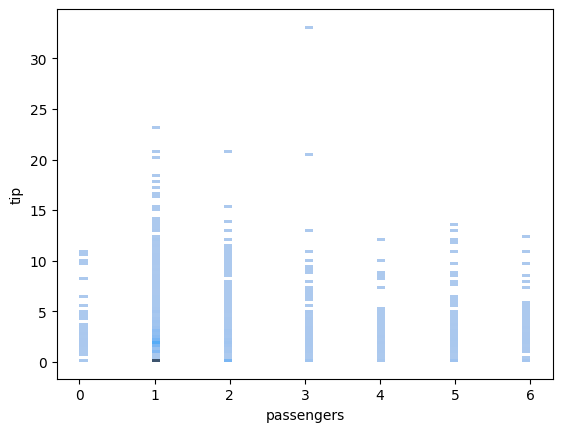

In [46]:

sns.histplot(taxi, x="passengers", y="tip")

Згідно з гістограммою нема прямої залежності кількості пасажирів та величини.
Також з цих данних бачимо, що найбільшу кількість і величину чайових бачимо в поїздках з одним пасажиром,
що частково пояснюється тим що таких поїздок

В наступному графіку ми перевіряємо яка величина чайових є найрозповсюдженішою, а також яка середня величина чайових

<Axes: xlabel='tip', ylabel='Density'>

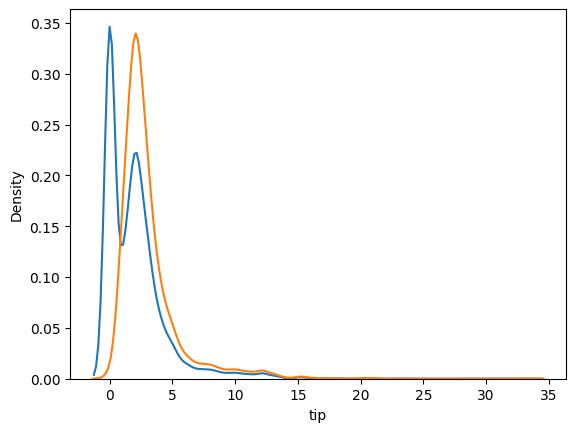

In [29]:

sns.kdeplot(taxi, x="tip")
tip = taxi["tip"]
sns.kdeplot(taxi, x=tip[tip > 0])



Згідно з графіком найчастіше люди взагалі не лишають чайових, а середня величина чайових приблизно 3 доллари.

В наступному графіку перевіряємо залежність величини чайових від дальності поїздки

<Axes: xlabel='tip', ylabel='distance'>

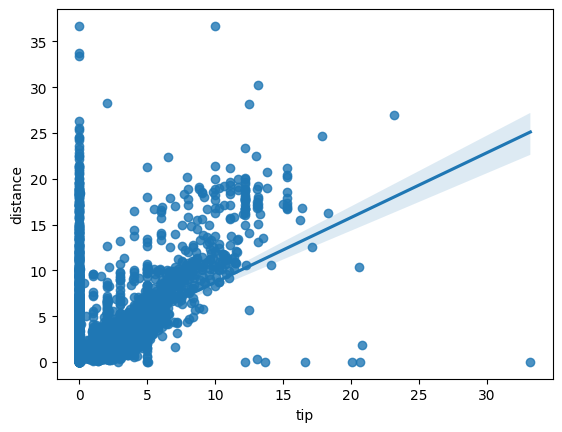

In [38]:
sns.regplot(x="tip", y="distance", data=taxi)

Згідно з графіком ріст чайових не є прямо залежним від дальності поїздки і чим більшим є дальність поїздки тим частіше меншим є відсоток чайових до кілометражу.

Далі перевіряємо чи є залежність величини чайових від району, з якого клієнти виїжджають

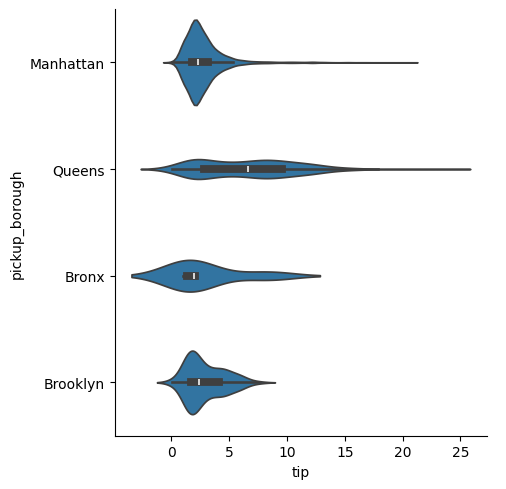

In [44]:
sns.catplot(x=tip[tip > 0], y='pickup_borough', data=taxi, kind="violin")

Бачимо що є відчутна різниця серед районів. Найбільші чайові в середньому дають пасажири з Queens, а найменша середня величина чайових при більшій кількості поїздок Manhattan